In [69]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import uncertainties
from uncertainties import ufloat, unumpy
from uncertainties.umath import log, sin, radians
from scipy.odr import ODR, Model, RealData
from scipy.optimize import fsolve, curve_fit
from matplotlib.ticker import AutoMinorLocator, LogLocator
from scipy import constants

## Measurement of the speed of sound

### Speed of sound in polyacrylic

In [70]:

errL = 0.05 * 1e-3
errT = np.sqrt(2) * 1 * 1e-6

bigC_L = ufloat(12.175 * 1e-2, errL)
midC_L = ufloat(8.080 * 1e-2, errL)
smallC_L = ufloat(4.125 * 1e-2, errL)
t_big = ufloat(86.19 * 1e-6, errT)
t_mid = ufloat(56.6 * 1e-6, errT)
t_small = ufloat(25.7 * 1e-6, errT)

cylinder = [[bigC_L, t_big], [midC_L, t_mid], [smallC_L, t_small]]
cA, _, _ = np.array([2 * i[0] / i[1] for i in cylinder ]) / 1000

# np.array([smallC_L, midC_L, bigC_L]) * 1e2

### Speed of sound in water

In [71]:
errD = 2 * 1e-3
errT = errT = np.sqrt(2) * 2 * 1e-6

d1, d2 = ufloat(2.9 * 1e-2, errD), ufloat(4.6 * 1e-2, errD)
t1, t2 = ufloat(37.68 * 1e-6, errT), ufloat(62.31 * 1e-6, errT)

water = [[d1, t1], [d2, t2]]
_, cw = np.array([2 * i[0] / i[1] for i in water ])
np.array([2 * i[0] / i[1] for i in water ]) / 1000

array([1.5392781316348196+/-0.15690755922226846,
       1.4764885251163538+/-0.09280606036116835], dtype=object)

## Rate of absorption

In [72]:
def calc_exp(l, I0, I1):
    return log(I0/I1)*(1/(2*l))

In [73]:
errA = 0.02
l = [ufloat(7.010, 0.005), ufloat(4.005, 0.005), ufloat(2.510, 0.005), ufloat(2.510, 0.005)]
A0 = [ufloat(1.15, errA), ufloat(1.19, errA), ufloat(1.26, errA), ufloat(1.21, errA)]
A1 = [ufloat(0.07, errA), ufloat(0.10, errA), ufloat(0.64, errA), ufloat(0.15, errA)]

In [74]:
lam = [calc_exp(i, A0[index], A1[index]) for index, i in enumerate(l)]
np.mean(lam[:3])

0.2145885876714543+/-0.011023604656756442

In [75]:
lam[3]

0.415884530775803+/-0.02677655362134625

### Speed of sound in aluminium

In [76]:
def calc_speed(alpha, beta, cw):
    return (sin(radians(beta))/sin(radians(alpha))) * cw

In [114]:
errAlpha = 2
longitudinal = calc_speed(ufloat(15, errAlpha), 90, cw) / 1000
transvers1 = calc_speed(ufloat(21, errAlpha), 45, cw) / 1000
transvers2 = calc_speed(ufloat(32, errAlpha), 90, cw) / 1000
print(f'longitudinal, beta=90°, alpha=15°: {longitudinal:.3f} km/s')
print(f'transvers1, beta=45°, alpha=21°: = {transvers1:.3f} km/s')
print(f'transvers2, beta=90°, alpha=32°: = {transvers2:.3f} km/s')


longitudinal, beta=90°, alpha=15°: 5.705+/-0.825 km/s
transvers1, beta=45°, alpha=21°: = 2.913+/-0.322 km/s
transvers2, beta=90°, alpha=32°: = 2.786+/-0.234 km/s


## Non-invasive distance measurement

In [92]:
c_Acryl = 2780
names = np.array(['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9a', 'B9b', 'B10', 'tot'])
values = np.array([7.75, 15.45, 24.14, 31.54, 39.92, 47.43, 55.02, 62.62, 20.64, 18.04, 57.02, 80.2])
depths = unumpy.uarray(values, np.full(len(values), 0)) * 1e-3 / c_Acryl * cA * 1000 
depths * 1000
all_depths = np.column_stack((names, depths * 1000))
all_depths

array([['B1', 7.875878204502185+/-0.12926861557054142],
       ['B2', 15.700944291555968+/-0.25770324007288586],
       ['B3', 24.532090304088094+/-0.40265088772553165],
       ['B4', 32.05228368645147+/-0.5260815658186938],
       ['B5', 40.56839457080351+/-0.665858468848518],
       ['B6', 48.200374611553364+/-0.7911239272917135],
       ['B7', 55.91365404022067+/-0.9177237714440245],
       ['B8', 63.63709589237765+/-1.0444904138099746],
       ['B9a', 20.97524208270001+/-0.34427151295173875],
       ['B9b', 18.333011975383148+/-0.3009039774054925],
       ['B10', 57.94613873815672+/-0.951083414171906],
       ['tot', 81.50263638723553+/-1.3377216733880546]], dtype=object)

In [105]:
d1MHz = ufloat(1.62, np.sqrt(2) * 0.02) / c_Acryl * cA * 1000
d2MHz = ufloat(1.93, np.sqrt(2) * 0.01) / c_Acryl * cA * 1000
d4MHz = ufloat(1.78, np.sqrt(2) * 0.01) / c_Acryl * cA * 1000
print(f'd1MHz = {d1MHz:.3f}')
print(f'd2MHz = {d2MHz:.3f}')
print(f'd4MHz = {d4MHz:.3f}')

d1MHz = 1.646+/-0.039
d2MHz = 1.961+/-0.035
d4MHz = 1.809+/-0.033


In [112]:
np.sqrt(2)*.2

0.28284271247461906

## Debye-Sears-effect

In [226]:
s = ufloat(2.92, 0.04)
nu_ultra = np.arange(3, 13, 1) * 1e6
lam_red = 650 * 1e-9
lam_green = 532 * 1e-9
lam_violett = 405 * 1e-9
x_violett = unumpy.uarray([2.5, 3, 4, 5, 5.5, 6.5, 7, 8, 8.5, 9], np.full(len(nu_ultra), np.sqrt(2) * .5)) * 1e-3
x_green = unumpy.uarray([3, 4, 5, 6, 7, 8, 9, 10, 11, 12], np.full(len(nu_ultra), np.sqrt(2) * .5)) * 1e-3
x_red = unumpy.uarray([4, 5, 6, 7.5, 8.5, 10, 11, 12, 13.5, 15], np.full(len(nu_ultra), np.sqrt(2) * .5)) * 1e-3


In [227]:
def lin(x, a):
    return a*x

In [228]:
popts = []
pcovs = []
for i in [x_violett, x_green, x_red]:
    popt, pcov = curve_fit(lin, nu_ultra, unumpy.nominal_values(i), sigma=unumpy.std_devs(i), absolute_sigma=True)
    popts.append(popt)
    pcovs.append(pcov)

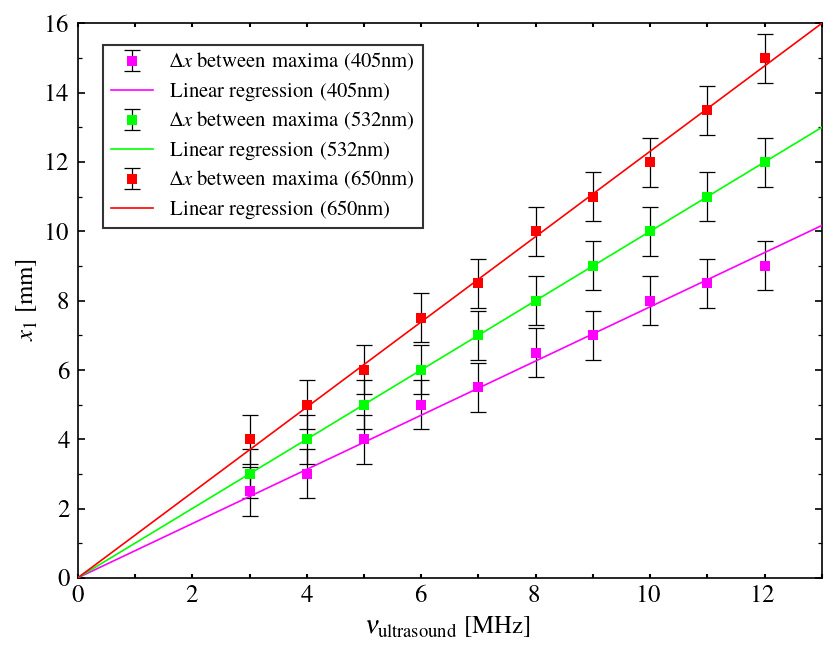

In [232]:
fig, ax = plt.subplots(dpi=150)

plt.rcParams["font.family"] = "times"
plt.rcParams["text.usetex"] = True

x = np.linspace(0, 13, 1000)

for index, i in enumerate(['magenta', 'lime', 'red']):
    labels = ['Linear regression (405nm)', 'Linear regression (532nm)', 'Linear regression (650nm)']
    ax.plot(x, lin(x * 1e6, popts[index][0]) * 1000,
        c=i,
        linewidth=.8,
        label=labels[index],
        zorder=3)


ax.errorbar(nu_ultra / 1e6, unumpy.nominal_values(x_violett) * 1000,
            capsize=4,
            xerr=None, yerr=unumpy.std_devs(x_violett) * 1000,
            ecolor='black',
            elinewidth=.6,
            capthick=.6,
            markersize=5, fmt="s",
            markeredgecolor='none', c="magenta",
            label='$\Delta x$ between maxima (405nm)',
            zorder=2)
ax.errorbar(nu_ultra / 1e6, unumpy.nominal_values(x_green) * 1000,
            capsize=4,
            xerr=None, yerr=unumpy.std_devs(x_green) * 1000,
            ecolor='black',
            elinewidth=.6,
            capthick=.6,
            markersize=5, fmt="s",
            markeredgecolor='none', c="lime",
            label='$\Delta x$ between maxima (532nm)',
            zorder=2)
ax.errorbar(nu_ultra / 1e6, unumpy.nominal_values(x_red) * 1000,
            capsize=4,
            xerr=None, yerr=unumpy.std_devs(x_red) * 1000,
            ecolor='black',
            elinewidth=.6,
            capthick=.6,
            markersize=5, fmt="s",
            markeredgecolor='none', c="red",
            label='$\Delta x$ between maxima (650nm)',
            zorder=2)
ax.set_xlim(0, 13)
ax.set_ylim(0, 16)
# ax.plot(x, linear([lin_output.beta[0], lin_output.beta[1] * 1e14], x),
#         c='red',
#         linewidth=.8,
#         label='Linear fit',
#         zorder=3)
ax.set_ylabel('$x_1$ [mm]', fontsize=12)
ax.set_xlabel(r'$\nu_\mathrm{ultrasound}$ [MHz]', fontsize=12)
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(axis='x', which='both',direction='in', labelsize=12, width=1, length=2, bottom=True, top=True)
ax.tick_params(axis='y', which='both',direction='in', labelsize=12, left=True, right=True)

handles, labels = plt.gca().get_legend_handles_labels()
order = [3,0,4,1,5,2]  

plt.legend([handles[idx] for idx in order],
        [labels[idx] for idx in order],
        loc="upper left",
        bbox_to_anchor=(0.02, 0.98),
        fancybox=False,
        edgecolor='black',
        fontsize=10)
plt.show()

fig.savefig('/Users/danielmiksch/Library/CloudStorage/OneDrive-Persönlich/Uni/C-Praktikum/C35/debye_sears.pdf')

In [230]:
c_ws = []
for index, i in enumerate(np.array([405, 532, 650]) * 1e-9):
    c = (s*i) / ufloat(popts[index][0], pcovs[index][0]) / 1000
    c_ws.append(c)
    

In [231]:
print(f'v405nm = {c_ws[0]:.3f}')
print(f'v532nm = {c_ws[1]:.3f}')
print(f'v650nm = {c_ws[2]:.3f}')

v405nm = 1.512+/-0.021
v532nm = 1.553+/-0.021
v650nm = 1.542+/-0.021


## Thickness of acrylic block

In [247]:
cAcryl = cA * 1000

t_ceptrum = ufloat(7.44, 0.01) * 1e-6
t_runtime = ufloat(36.48, 0.01) * 1e-6

d_ceptrum = (cAcryl* t_ceptrum) / 2 * 1000
d_runtime = cAcryl * t_runtime / 10 * 1000

print(f'd_ceptrum = {d_ceptrum:.2f}')
print(f'd_runtime = {d_runtime:.2f}')

d_ceptrum = 10.51+/-0.17
d_runtime = 10.31+/-0.17
